# 2018 Bay Wheels Ride Data Exploration and Visualization

### By Elham Daha

## Investigation Overview

In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type, and time impacts usage of the system.

## Dataset Overview

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, raw data is available here. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

In [2]:
df_cleaned = pd.read_csv('fordgo_master_clean.csv')
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,start_date,distance_km,distance_miles
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,No,January,1,Wed,22,19,1254,2018-01-31,2.492254,1.548614
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,January,1,Wed,16,15,1423,2018-01-31,0.000000,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,No,January,1,Wed,14,10,1192,2018-01-31,2.974502,1.848270
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,No,January,1,Wed,14,7,1017,2018-01-31,2.049710,1.273630
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,No,January,1,Wed,19,6,666,2018-01-31,2.440571,1.516500


Note that the above cells have been set as "Skip"-type slides. That means that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Month
Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.

<Figure size 841.68x595.44 with 0 Axes>

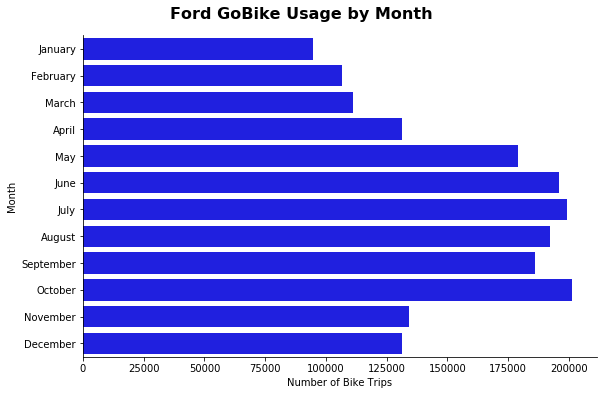

In [3]:
# Monthly usage of the Ford Go Bike system
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, y = 'start_time_month', kind = 'count', color = 'blue', aspect = 1.7);

graph.set_axis_labels('Number of Bike Trips','Month');

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford GoBike Usage by Hour
The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.

<Figure size 841.68x595.44 with 0 Axes>

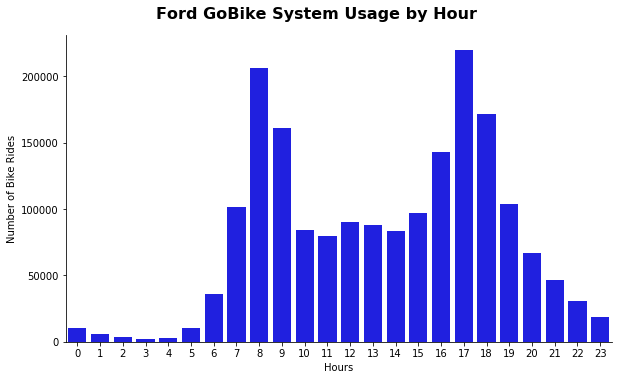

In [10]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color= 'blue', aspect = 1.7);

graph.set_axis_labels('Hours', 'Number of Bike Rides');

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Ford GoBike System Trends by User Type

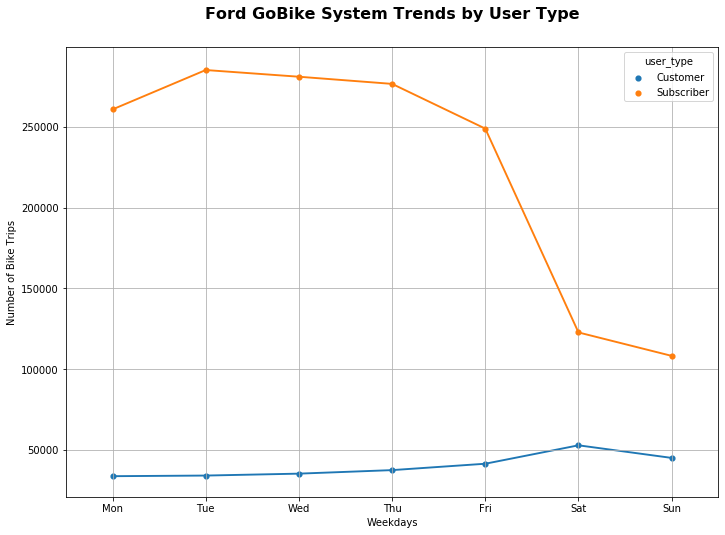

In [9]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 11.69, 8.27]);

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold');
plt.xlabel('Weekdays');
plt.ylabel('Number of Bike Trips');
plt.grid();

## Ford Go Bike System - Duration (Min) by User Type
The catplot and boxplot show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

<Figure size 841.68x595.44 with 0 Axes>

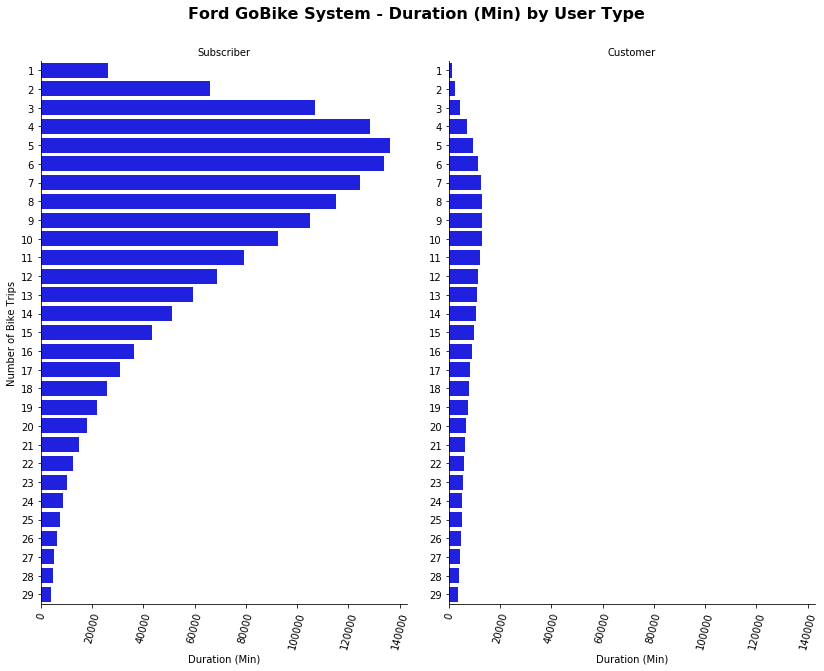

In [8]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, y = 'duration_min', col='user_type', kind='count', sharey = False, color = 'blue', height = 8.27,  aspect = (11.69/2)/8.27);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips');
graph.set_titles('{col_name}');

graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

<Figure size 841.68x595.44 with 0 Axes>

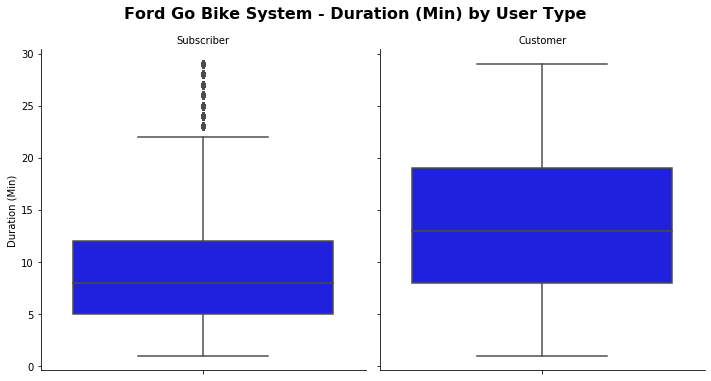

In [7]:
plt.figure(figsize=[11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = 'blue');

g.set_titles(col_template = '{col_name}');
g.set_axis_labels("", "Duration (Min)");
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

## User Types and Their Monthly Usage 
Subscribers contributed the majority of the bike usage in 2018, about 89%, while about 15% were consumed by cusomters (or casual users). Both subscribers and customers ride the most during the summer months with subscribers maxed out in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January likely due to the weather.

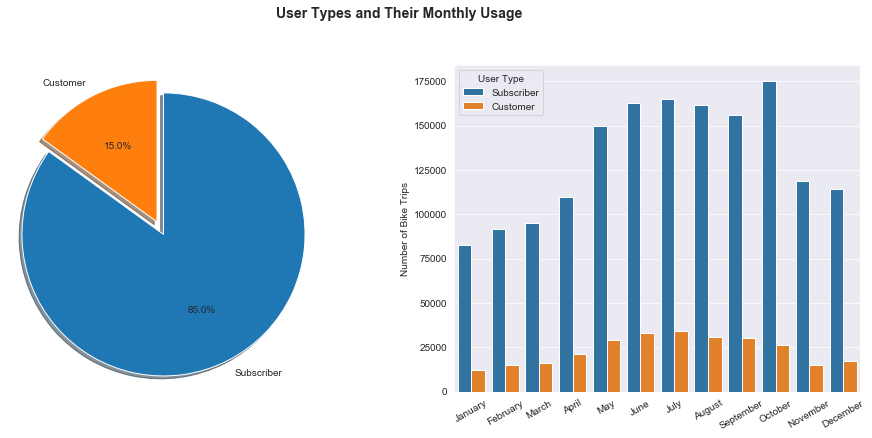

In [11]:
plt.figure(figsize = [16,6])
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df_cleaned.user_type.value_counts()/df_cleaned.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df_cleaned, x='start_time_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Number of Bike Trips');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

## Ford GoBike System - Start Time vs. Weekday by User Type
Customers use the bike sharing system more often on weekends, while Subscribers primarily use the bikes on weekdays. Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm. Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

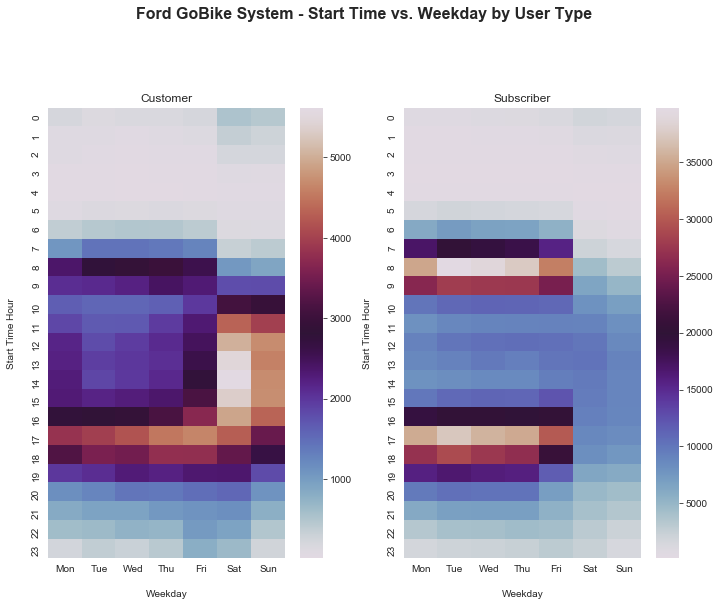

In [12]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[11.69, 8.27]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id');
sb.heatmap(df_customer, cmap = 'twilight');

plt.title('Customer', y=1.05);
plt.xlabel('Weekday', labelpad = 16);
plt.ylabel('Start Time Hour',  labelpad = 16);

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id');
sb.heatmap(df_subscriber, cmap = 'twilight');

plt.title("Subscriber", y=1.05);
plt.xlabel('Weekday', labelpad = 16);
plt.ylabel('Start Time Hour', labelpad = 16);

plt.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford GoBike System - Summary

This project is a win - win situation where a large number of people can benefit from this program:

- Environmentally friendly, budget friendly, and lifetsyle friendly.
- Subscribers (i.e. daily commuters) benefit from a health commuting choice
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- Affordable and convenient transportation for the people of all socioeconomic classes

Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.